In [2]:
import numpy as np

In discrete-event (event-driven) simulation, time is not scanned regularly, but we jump from one event to the next
- Good features: no time is wasted while no events, can model most systems of interest
- More difficult to program: need to manage time, events, counters
- When an event occurs: update time, update counters, execute event, generate future events and put them in the event calendar (if any), modify current events (if any)

Our model:
- Bernoulli arrivals: 1 with probability a
- Geometric service times: 1 with probability b (depart only if there are users in the system)
- memoryless system: no memory of past events
- Arrivals cannot depart and leave in the same slot

Variables:
- time t: current time
- number of users n_system: number of users in the system
- number of arrivals n_arrivals: number of arrivals in the system
- number of departures n_departures: number of departures in the system
- total cumulative delay cum_delay: cumulative delay of all users
- total cumulative number of users cum_n_system: cumulative number of users in the system


In [3]:
def FIFO (dep_prob, arr_prob, maxtime=1000):
    t, n_system, n_arrivals, n_departures = 0,0,0,0 # t count the slot
    cum_delay, cum_n_system = 0,0  

    # we consider a slotted time and simulate what happens in the slot
    while t<maxtime:
        # if there are users in the system, consider departure probability
        if n_system > 0:
            cum_n_system+=n_system #accumulate the number of users in the system
            u = np.random.uniform()
            if u < dep_prob:
                n_departures+=1
                n_system-=1
        u = np.random.uniform()
        if u < arr_prob:
            n_arrivals+=1
            n_system+=1
        t+=1
    avg_throughput = n_departures/maxtime #how many users has been served in the system
    avg_delay = cum_n_system/n_departures
    avg_occupancy = cum_n_system/maxtime
    return avg_throughput, avg_delay, avg_occupancy

In [7]:
arr_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
dep_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
throughputs = np.zeros((len(arr_probs),len(arr_probs)), dtype=float)
delays = np.zeros((len(arr_probs),len(arr_probs)), dtype=float)
occupancies = np.zeros((len(arr_probs),len(arr_probs)), dtype=float)

In [8]:
for a in range(len(arr_probs)) :
    for d in range(len(dep_probs)) :
        throughputs[a,d], delays[a,d], occupancies[a,d] = FIFO(dep_probs[d], arr_probs[a])

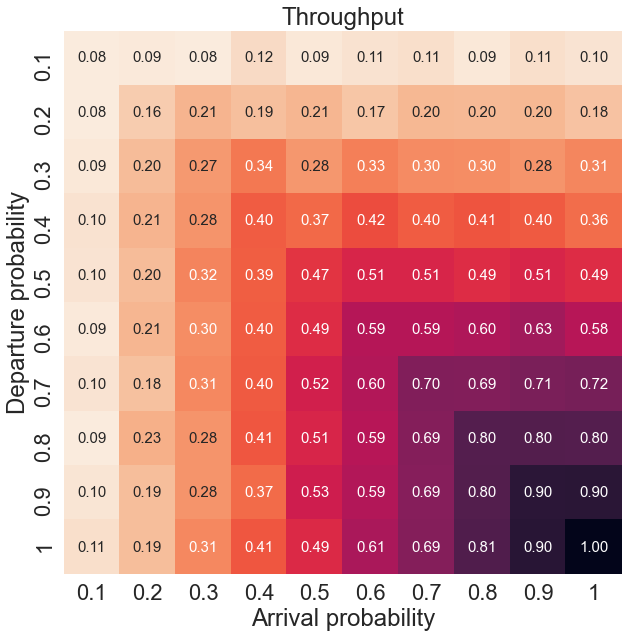

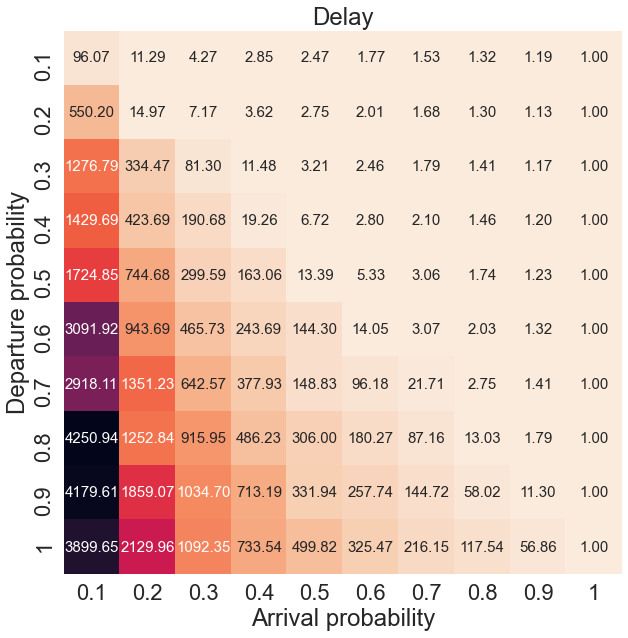

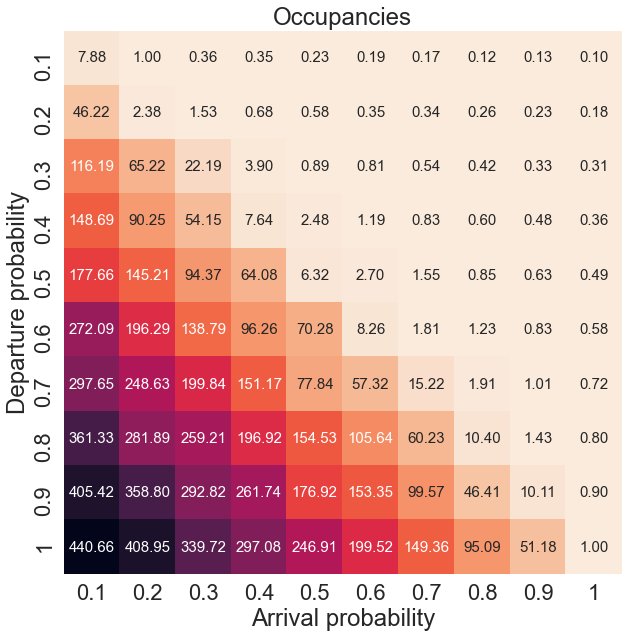

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white',palette='Dark2',font_scale=2)
lw=0
ts=15
ls = '--'
m = 'o'
col = 0  

import os
if not os.path.exists('figures'):
    os.makedirs('figures')

for l, d in zip(['Throughput', 'Delay', 'Occupancies'], [throughputs, delays, occupancies]):   
    fig, ax = plt.subplots(figsize=(10,10))
  
    sns.heatmap(d, annot=True, ax=ax, fmt='.2f', cmap='rocket_r', cbar=False, 
                         linewidths=lw, linecolor='k', annot_kws={"size":ts})               
    ax.set_title(l)
    ax.set_xlabel('Arrival probability')
    ax.set_ylabel('Departure probability')
    ax.set_xticklabels(arr_probs)
    ax.set_yticklabels(dep_probs)
    fig.savefig('figures/FIFO_'+l+'.pdf', bbox_inches='tight')
    